In [22]:
from collections import namedtuple, defaultdict, deque
from graphviz import Digraph
import sys, os
from random import seed
from random import randint
# seed random number generator
seed()

def file_to_graph(filename):
    graph = defaultdict(set)
    with open(filename) as file:
            # make a list of strings from lines of the input file
            file_data = file.readlines()

    num_classes = int(file_data.pop(0))
    course = 1
    for line in file_data:
        # print(line)
        classes = line.split()
        # print(classes)
        num_prereqs = int(classes.pop(0))
        # print(num_prereqs)
        for i in range(num_prereqs):
            pre_req = classes.pop(0)
            graph[pre_req].add(str(course))
        course += 1
    return graph, num_classes

def dfs(graph, u, cyclic_node, color):
    color[u] = 'grey'
    for v in graph[u]:
        if color[v] == 'black':
            cyclic_node.append(v)
        if color[v] == 'grey':
            cyclic_node.append(v)
            return True
        if color[v] == 'white' and dfs(graph, v, cyclic_node, color) == True:
            return True
    color[u] = 'black'
    return False

def get_edges(node, graph):
    # print('looking for cycle')
    paths = []
    searchQ = deque()
    searchQ.append(node)
    processed = set()
    parent_list = defaultdict(list)
    while searchQ:
        u = searchQ.popleft()
        # print(u)
        # print(graph[str(u)])
        for v in graph[u]:
            # print(f'parent: {u} child: {v}')
            if v not in processed:
                if v == node:
                    child = v
                    parent = u
                    # print('Found Cycle')
                    paths.append(print_path(parent_list, parent, child, node))
                else:
                    parent_list[v] = u
                    searchQ.append(v)
                    processed.add(v)
    return paths

def print_path(parentList, parent, child, start):
    path = []
    while True:
        edge = (str(parent), str(child))
        path.append(edge)
        # if edge in path:
        #     break
        # else: 
        if parent == start:
            break
        child = parent
        parent = parentList[parent]
    return path

def find_cycles(graph, num_classes):
    color = defaultdict(str)
    for i in range(1, num_classes+1):
        color[str(i)] = 'white'
    cycles = []
    cycle_nodes = []
    for i in range(1, num_classes+1):
        u = str(i)
        if color[u] == 'white':
            dfs(graph, u, cycle_nodes, color)
    for elem in cycle_nodes:
        c = [x for x in get_edges(elem, graph)]
        for elem in c:
            cycles.append(elem)
    return cycles

def graph_to_dot(graph):
    dot = Digraph(format='svg')
    dot.attr(rankdir='LR')
    dot.attr('node', width='.4', fixedsize='true', shape='circle')
    # add all the states to the graph
    # nodes = set()
    # nodes_added = set
    for first_state, edges in graph.items():
        dot.node(str(first_state))
        for second_state in edges:
            dot.node(str(second_state))
            dot.edge(str(first_state), str(second_state))
    return dot

def graph_to_png(graph):
    dot = Digraph(format='png')
    dot.attr(rankdir='LR')
    dot.attr('node', width='.4', fixedsize='true', shape='circle')
    # add all the states to the graph
    for first_state, edges in graph.items():
        dot.node(str(first_state))
        for second_state in edges:
            dot.node(str(second_state))
            dot.edge(str(first_state), str(second_state))

    dot_filename = f'graph.dot' 
    with open(dot_filename, 'w') as f:
        f.write(dot.source)
    os.system('sfdp -x -Goverlap=scale -Tpng graph.dot > graph.png')

    dot.render(directory='doctest-output').replace('\\', '/')

def graph_to_dot_cycle_highlight(graph, subgraphs, colorlist):
    dot = Digraph(format='svg')
    dot.attr(rankdir='LR')
    dot.attr('node', width='.4', fixedsize='true', shape='circle')
    # add all the states to the graph
    cyclic_edges = set()
    counter = 0
    for s in subgraphs:
        n = 'cluster_' + str(counter)
        if len(colorlist) == 0:
            colorlist = make_color_list()
        else:
            color_indx = randint(0, (len(colorlist)-1))
        color = colorlist.pop(color_indx)
        with dot.subgraph(name=n) as c:
            c.attr('edge', color=color)
            c.edges(s)
        counter += 1
        cyclic_edges.update(set(s))

    for first_state, edges in graph.items():
        dot.node(first_state)
        for second_state in edges:
            dot.node(second_state)
            if (first_state, second_state) not in cyclic_edges:
                dot.edge(first_state, second_state)
    return dot

def make_color_list():
    with open('colors.txt') as file:
            # make a list of strings from lines of the input file
            file_data = file.read()
    colors = file_data.split()
    return colors

In [23]:
g, num_classes = file_to_graph('multiplescc.txt')
# print(g)
subgraphs = find_cycles(g, num_classes)
print(subgraphs)
color_list = make_color_list()
# d = graph_to_dot_cycle_highlight(g, subgraphs, color_list)
d = graph_to_dot(g)

[[('4', '1'), ('1', '4')], [('2', '1'), ('4', '2'), ('1', '4')], [('4', '2'), ('1', '4'), ('2', '1')], [('3', '2'), ('1', '3'), ('2', '1')], [('1', '4'), ('4', '1')], [('5', '4'), ('1', '5'), ('4', '1')], [('7', '6'), ('6', '7')], [('10', '9'), ('11', '10'), ('9', '11')], [('13', '12'), ('12', '13')], [('18', '15'), ('15', '18')], [('16', '15'), ('17', '16'), ('15', '17')], [('18', '15'), ('15', '18')], [('16', '15'), ('17', '16'), ('15', '17')], [('28', '26'), ('26', '28')], [('27', '26'), ('28', '27'), ('26', '28')], [('28', '26'), ('26', '28')], [('27', '26'), ('28', '27'), ('26', '28')], [('26', '29'), ('28', '26'), ('29', '28')], [('30', '29'), ('26', '30'), ('28', '26'), ('29', '28')], [('28', '26'), ('26', '28')], [('27', '26'), ('28', '27'), ('26', '28')], [('32', '31'), ('33', '32'), ('31', '33')], [('33', '32'), ('31', '33'), ('32', '31')], [('35', '34'), ('34', '35')], [('39', '36'), ('36', '39')], [('38', '36'), ('39', '38'), ('36', '39')], [('37', '36'), ('38', '37'), ('39

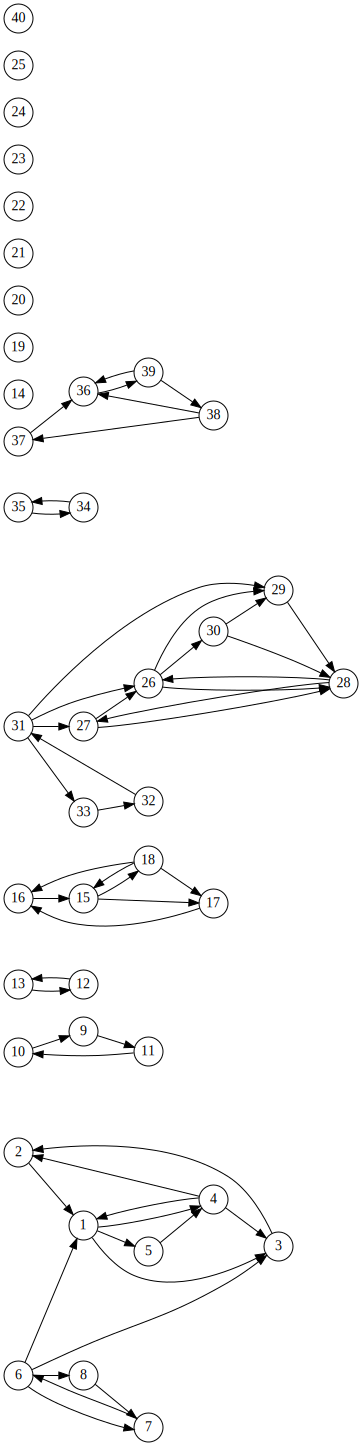

In [24]:
d